In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv

In [8]:
loadDir = 'result_dump'
saveDir = 'figures'
with open('{}/key_distribution_keys_16384_nodes_256_iter_0'.format(loadDir)) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in csvreader:
        intRow = np.int_(row[0].split(','))
        print(intRow.shape)   
    
# keys are axis 0, nodes axis 1, iterations axis 2


(257,)


[0.01152402 0.00921921 0.00433845 0.00366057 0.00257596 0.0017625
 0.00027115 0.00081346 0.00040673 0.00027115] [  0.   28.7  57.4  86.1 114.8 143.5 172.2 200.9 229.6 258.3 287. ] <a list of 1 Patch objects>


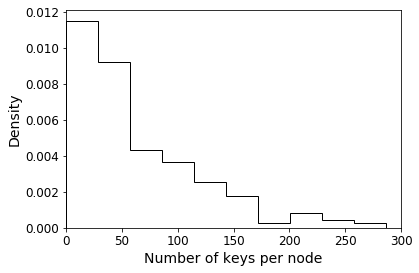

In [30]:
fs = 14

n, b, p = plt.hist(intRow, bins = 10, histtype = 'step', density = True, color = 'k', align = 'mid')
ax = plt.gca()
ax.set_ylabel('Density', fontsize = fs)
ax.set_xlabel('Number of keys per node', fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(0, 300)
print(n, b, p)
plt.savefig('{}/key_load_distribution'.format(saveDir))

[3.0115 3.398  3.8655 4.4115 4.932 ]
[0.06045763 0.08273149 0.00388909 0.01025305 0.00212132]


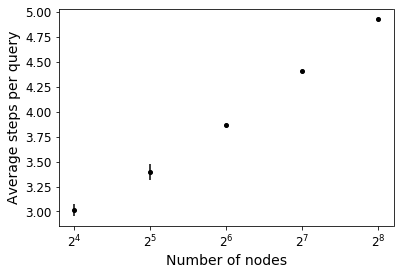

In [4]:
meanSteps = np.mean(countTensor[-1, :, :], axis = -1)
print(meanSteps)
semSteps = np.std(countTensor[-1, :, :], axis = -1) / np.sqrt(countTensor.shape[-1])
print(semSteps)
plt.errorbar([2**x for x in range(4, 9)], meanSteps, fmt = 'ko', yerr = semSteps, markersize = 4)
ax = plt.gca()
ax.set_xscale('log', basex = 2)
ax.set_xlabel('Number of nodes', fontsize = fs)
ax.set_ylabel('Average steps per query', fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('{}/bar_count_matrix.png'.format(saveDir))